# How to Generate a Last Interaction Velocity Plot
The Last Interaction Velocity Plot tracks and display the velocities at which different elements (or species) last interacted with packets in the simulation.

In [1]:
# We filter out warnings throughout this notebook
import warnings
warnings.filterwarnings('ignore')

# Due to the large size of the Last Interaction Velocity plots in SVG format, we request output as a
# high-resolution PNG
%config InlineBackend.figure_formats='png2x'

First, create and run a simulation for which you want to generate this plot:

In [2]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He')

sim = run_tardis("tardis_example.yml", virtual_packet_logging=True)

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Atomic Data kurucz_cd23_chianti_H_He already exists in /Users/sarthaksrivastava/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


[tardis.simulation.base][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (base.py:655)
[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /Users/sarthaksrivastava/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:36)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:258)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data, linelist (base.py:262)
[tardis.io.model.parse_density_configuration][WARNING]  
	Number of density points larger than number of shells. Assuming inner point irrelevant (parse_density_configuration.py:114)
[tardis.model.matter.decay][INFO   ]  
	Decaying abundances for 1123200.0 seconds (decay.py:101)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 20 (base.py:371)


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 7.942e+42 erg / s
	Luminosity absorbed  = 2.659e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,9.93e+03 K,1.01e+04 K,0.4,0.507
5,9.85e+03 K,1.02e+04 K,0.211,0.197
10,9.78e+03 K,1.01e+04 K,0.143,0.117
15,9.71e+03 K,9.87e+03 K,0.105,0.0869


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 10703.212 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 2 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.071e+43 erg / s
	Luminosity absorbed  = 3.576e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.01e+04 K,1.08e+04 K,0.507,0.525
5,1.02e+04 K,1.1e+04 K,0.197,0.203
10,1.01e+04 K,1.08e+04 K,0.117,0.125
15,9.87e+03 K,1.05e+04 K,0.0869,0.0933


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10703.212 K
	Expected t_inner for next iteration = 10673.712 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 3 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.074e+43 erg / s
	Luminosity absorbed  = 3.391e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.08e+04 K,1.1e+04 K,0.525,0.483
5,1.1e+04 K,1.12e+04 K,0.203,0.189
10,1.08e+04 K,1.1e+04 K,0.125,0.118
15,1.05e+04 K,1.06e+04 K,0.0933,0.0895


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10673.712 K
	Expected t_inner for next iteration = 10635.953 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 4 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.058e+43 erg / s
	Luminosity absorbed  = 3.352e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.483,0.469
5,1.12e+04 K,1.12e+04 K,0.189,0.182
10,1.1e+04 K,1.1e+04 K,0.118,0.113
15,1.06e+04 K,1.07e+04 K,0.0895,0.0861


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10635.953 K
	Expected t_inner for next iteration = 10638.407 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 5 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.055e+43 erg / s
	Luminosity absorbed  = 3.399e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.469,0.479
5,1.12e+04 K,1.13e+04 K,0.182,0.178
10,1.1e+04 K,1.1e+04 K,0.113,0.113
15,1.07e+04 K,1.07e+04 K,0.0861,0.0839


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.407 K
	Expected t_inner for next iteration = 10650.202 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 6 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.398e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.479,0.47
5,1.13e+04 K,1.12e+04 K,0.178,0.185
10,1.1e+04 K,1.11e+04 K,0.113,0.112
15,1.07e+04 K,1.07e+04 K,0.0839,0.0856


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10650.202 K
	Expected t_inner for next iteration = 10645.955 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 7 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.382e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 5/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.47,0.47
5,1.12e+04 K,1.13e+04 K,0.185,0.178
10,1.11e+04 K,1.11e+04 K,0.112,0.112
15,1.07e+04 K,1.07e+04 K,0.0856,0.086


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10645.955 K
	Expected t_inner for next iteration = 10642.050 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 8 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.350e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 6/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.11e+04 K,0.47,0.472
5,1.13e+04 K,1.14e+04 K,0.178,0.175
10,1.11e+04 K,1.11e+04 K,0.112,0.111
15,1.07e+04 K,1.07e+04 K,0.086,0.084


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10642.050 K
	Expected t_inner for next iteration = 10636.106 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 9 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.052e+43 erg / s
	Luminosity absorbed  = 3.411e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 7/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.11e+04 K,0.472,0.469
5,1.14e+04 K,1.15e+04 K,0.175,0.17
10,1.11e+04 K,1.11e+04 K,0.111,0.109
15,1.07e+04 K,1.08e+04 K,0.084,0.0822


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.106 K
	Expected t_inner for next iteration = 10654.313 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 10 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.070e+43 erg / s
	Luminosity absorbed  = 3.335e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 8/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.1e+04 K,0.469,0.475
5,1.15e+04 K,1.14e+04 K,0.17,0.177
10,1.11e+04 K,1.11e+04 K,0.109,0.112
15,1.08e+04 K,1.06e+04 K,0.0822,0.0878


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10654.313 K
	Expected t_inner for next iteration = 10628.190 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 11 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.363e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 9/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.475,0.472
5,1.14e+04 K,1.12e+04 K,0.177,0.184
10,1.11e+04 K,1.1e+04 K,0.112,0.114
15,1.06e+04 K,1.06e+04 K,0.0878,0.0859


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10628.190 K
	Expected t_inner for next iteration = 10644.054 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 12 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.420e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 10/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.11e+04 K,0.472,0.467
5,1.12e+04 K,1.13e+04 K,0.184,0.176
10,1.1e+04 K,1.11e+04 K,0.114,0.11
15,1.06e+04 K,1.08e+04 K,0.0859,0.0821


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10644.054 K
	Expected t_inner for next iteration = 10653.543 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 13 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.406e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 11/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.11e+04 K,0.467,0.466
5,1.13e+04 K,1.13e+04 K,0.176,0.18
10,1.11e+04 K,1.11e+04 K,0.11,0.111
15,1.08e+04 K,1.08e+04 K,0.0821,0.0841


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10653.543 K
	Expected t_inner for next iteration = 10647.277 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 14 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.063e+43 erg / s
	Luminosity absorbed  = 3.369e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 12/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.11e+04 K,0.466,0.469
5,1.13e+04 K,1.13e+04 K,0.18,0.182
10,1.11e+04 K,1.1e+04 K,0.111,0.113
15,1.08e+04 K,1.07e+04 K,0.0841,0.0854


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10647.277 K
	Expected t_inner for next iteration = 10638.875 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 15 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.417e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 13/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.1e+04 K,0.469,0.484
5,1.13e+04 K,1.13e+04 K,0.182,0.181
10,1.1e+04 K,1.1e+04 K,0.113,0.113
15,1.07e+04 K,1.07e+04 K,0.0854,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.875 K
	Expected t_inner for next iteration = 10655.125 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 16 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.059e+43 erg / s
	Luminosity absorbed  = 3.445e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 14/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.1e+04 K,0.484,0.472
5,1.13e+04 K,1.13e+04 K,0.181,0.177
10,1.1e+04 K,1.1e+04 K,0.113,0.113
15,1.07e+04 K,1.06e+04 K,0.0858,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.125 K
	Expected t_inner for next iteration = 10655.561 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 17 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.067e+43 erg / s
	Luminosity absorbed  = 3.372e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 15/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04 K,1.11e+04 K,0.472,0.468
5,1.13e+04 K,1.14e+04 K,0.177,0.175
10,1.1e+04 K,1.11e+04 K,0.113,0.11
15,1.06e+04 K,1.08e+04 K,0.0858,0.0816


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.561 K
	Expected t_inner for next iteration = 10636.536 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 18 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.057e+43 erg / s
	Luminosity absorbed  = 3.365e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 16/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.11e+04 K,0.468,0.464
5,1.14e+04 K,1.13e+04 K,0.175,0.177
10,1.11e+04 K,1.1e+04 K,0.11,0.113
15,1.08e+04 K,1.07e+04 K,0.0816,0.0848


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.536 K
	Expected t_inner for next iteration = 10641.692 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 19 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.405e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)
[tardis.simulation.base][INFO   ]  
	Iteration converged 17/4 consecutive times. (base.py:245)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:521)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04 K,1.11e+04 K,0.464,0.466
5,1.13e+04 K,1.13e+04 K,0.177,0.177
10,1.1e+04 K,1.11e+04 K,0.113,0.111
15,1.07e+04 K,1.07e+04 K,0.0848,0.0853


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10641.692 K
	Expected t_inner for next iteration = 10650.463 K
 (base.py:548)
[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 19 iterations 
	Simulation took 51.93 s
 (base.py:449)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 20 of 20 (base.py:371)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.401e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:553)


<div class="alert alert-info">

Note

The virtual packet logging capability must be active in order to produce the Last Interaction Velocity Plot for virtual packets population. Thus, make sure to set `virtual_packet_logging: True` in your configuration file if you want to generate the Last Interaction Velocity Plot with virtual packets. It should be added under the `virtual` property of the `spectrum` property, as described in the [configuration schema](https://tardis-sn.github.io/tardis/io/configuration/components/spectrum.html).

</div>

Now, import the plotting interface for Last Interaction Velocity Plot, i.e. the `InteractionRadiusPlotter` class.

In [3]:
from tardis.visualization.tools.interaction_radius_plot import InteractionRadiusPlotter

And create a plotter object to process the data of simulation object `sim` for generating the Last Interaction Velocity plot.

In [4]:
plotter = InteractionRadiusPlotter.from_simulation(sim)

### Choosing what elements/ions to plot

You need to create a species_list for the species you want plotted in the Last Interaction Velocity Plot. Valid options include elements (e.g., Si), ions (specified in Roman numeral format, e.g., Si II), a range of ions (e.g., Si I-III), or any combination of these.

In [5]:
species_list = ["Si I-III", "Ca", "O", "S"]

## Static Plot (in matplotlib)
You can now call the `generate_plot_mpl()` method on your `plotter` object to get a highly informative, yet beautiful, Last Interaction Velocity plot produced in matplotlib.

### Virtual packets mode
By default, an Velocity Pracket Tracker plot is produced for the virtual packet population of the simulation.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

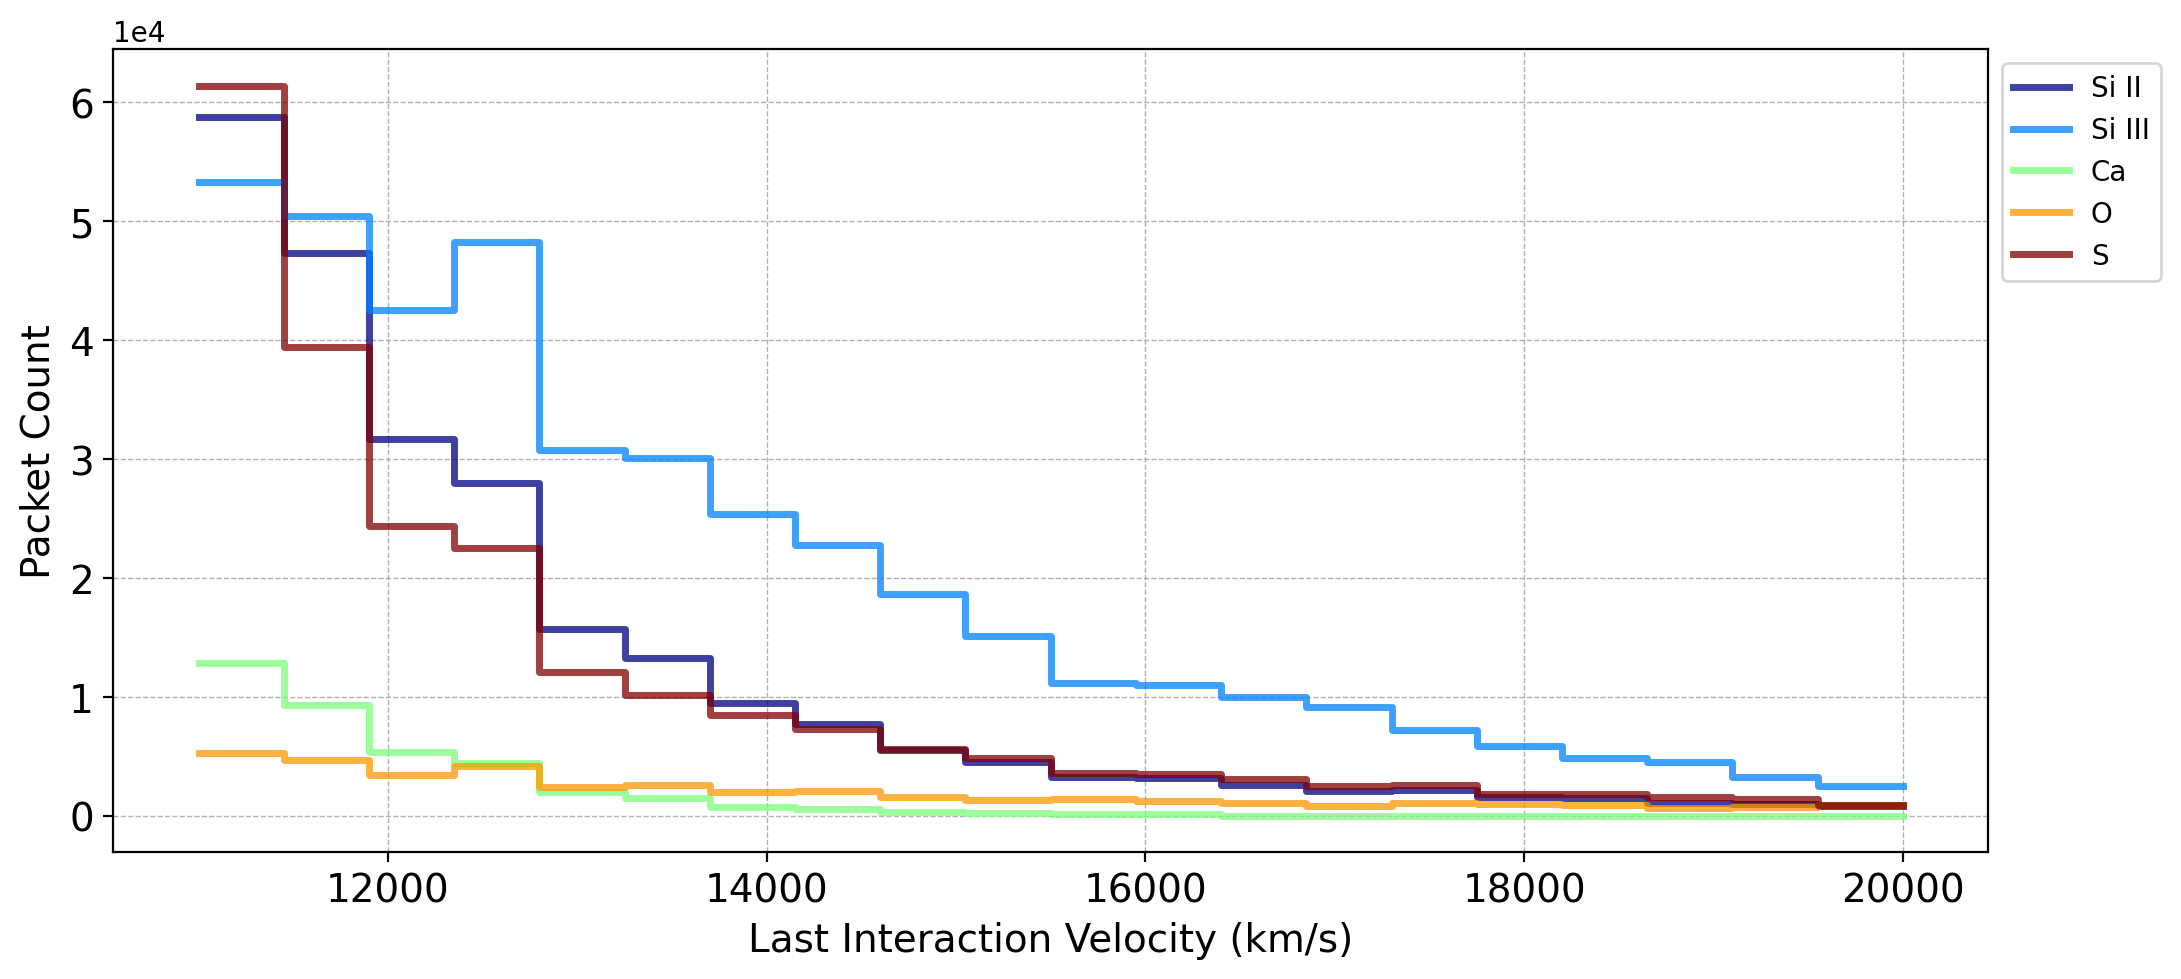

In [6]:
plotter.generate_plot_mpl(species_list=species_list)

### Real packets mode
You can produce the Last Interaction Velocity plot for the real packet population of the simulation by setting `packets_mode="real"` which is `"virtual"` by default.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

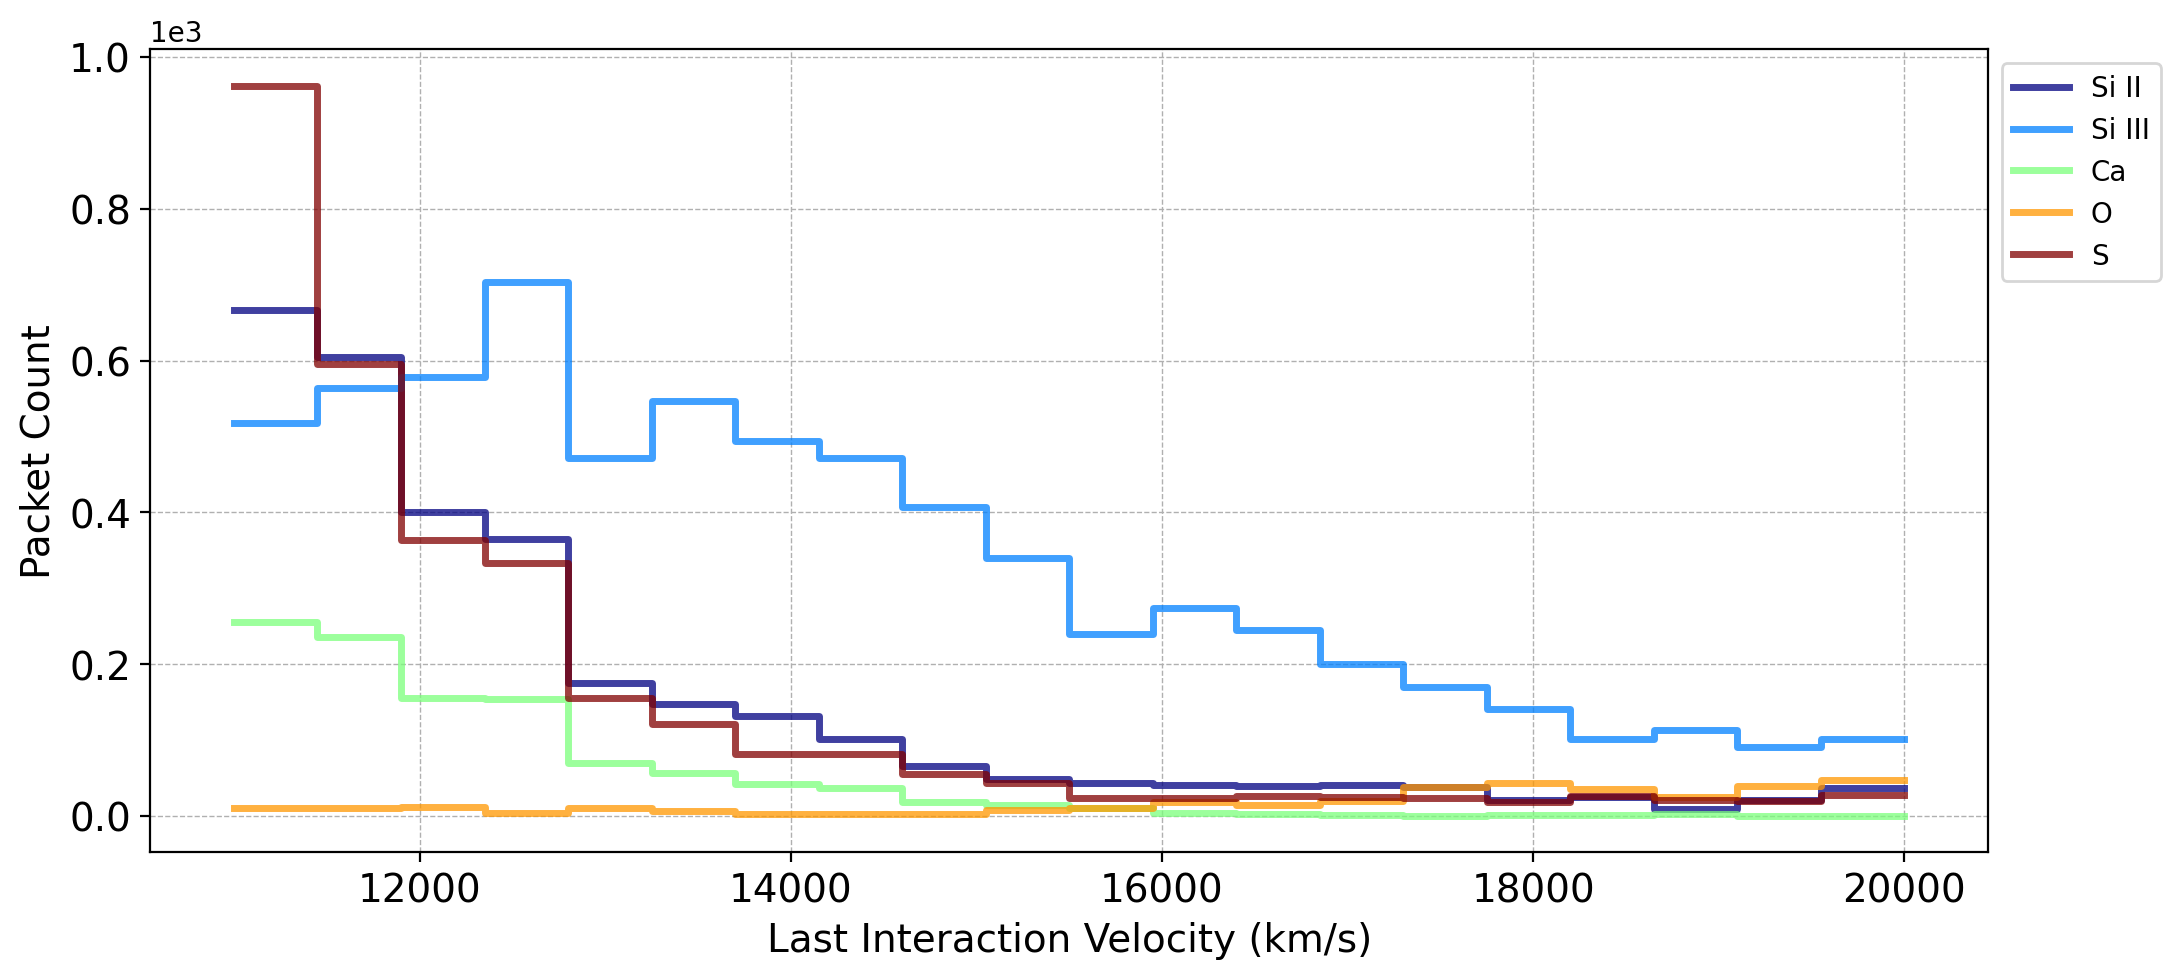

In [7]:
plotter.generate_plot_mpl(packets_mode="real", species_list=species_list)

## Plotting a specific number of bins
You can regroup the bins with broader widths within the same velocity range using `num_bins`.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

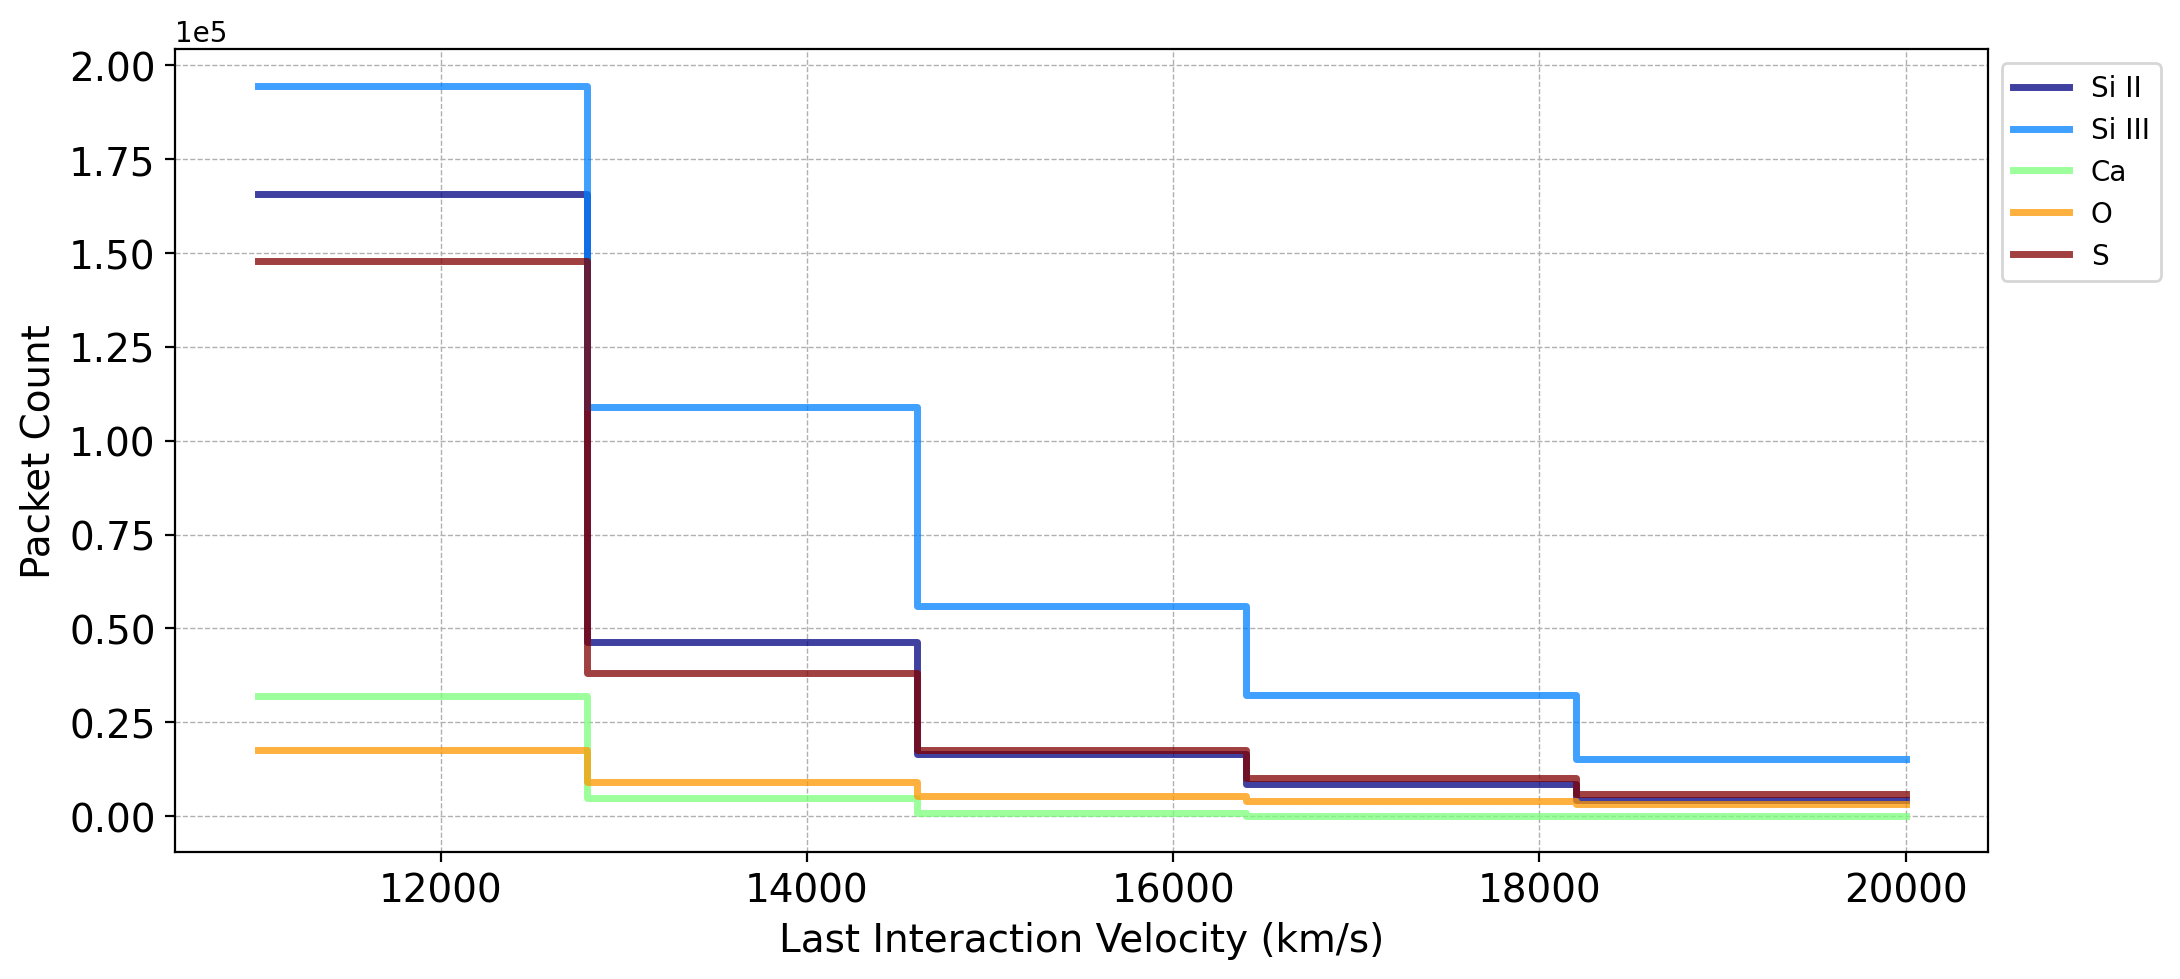

In [8]:
plotter.generate_plot_mpl(species_list=species_list, num_bins=5)

## Plotting a specific velocity range
You can restrict the range of bins to plot in the interaction radius plot by specifying `velocity_range`.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

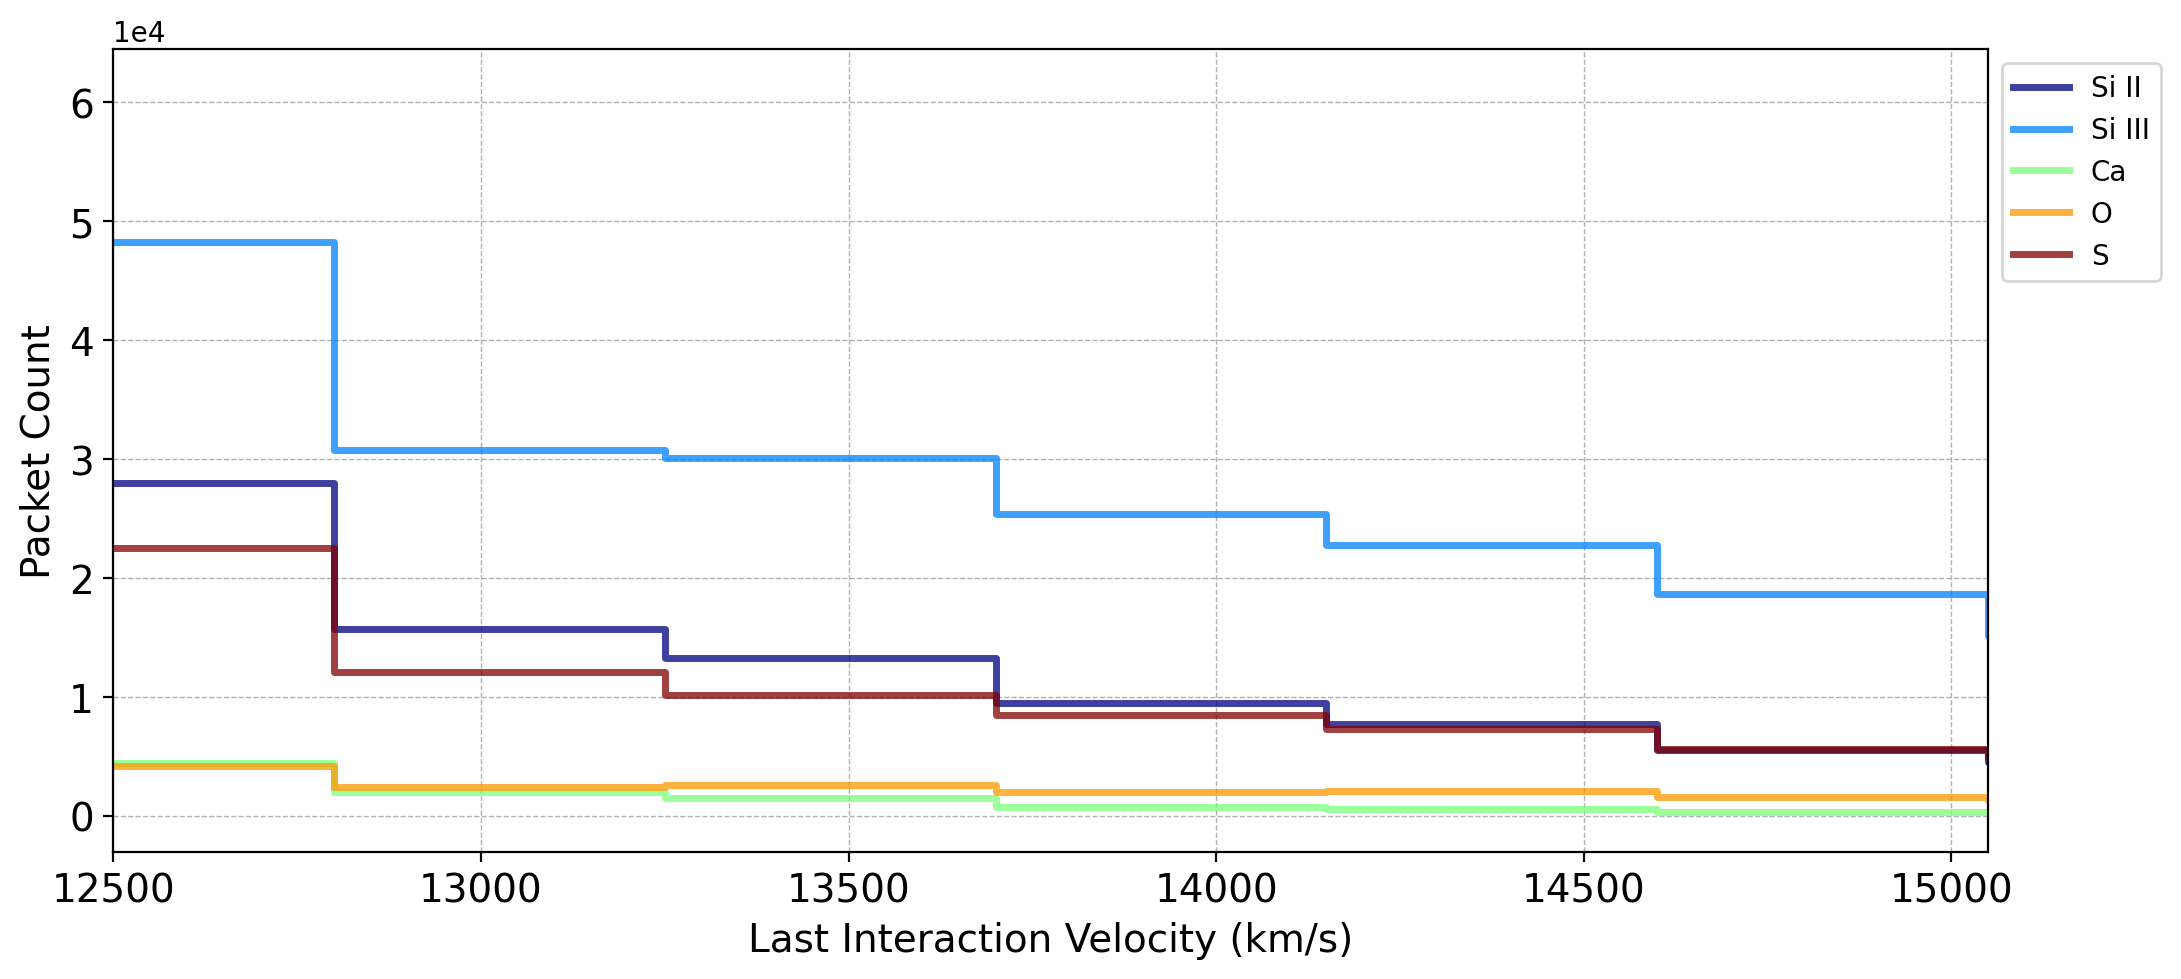

In [9]:
plotter.generate_plot_mpl(species_list=species_list, velocity_range=(12500, 15050))

## Additional plotting options
The `generate_plot_mpl` method also has options specific to the matplotlib API, thereby providing you with more control over how your interaction radius plot looks. Possible cases where you may use them are:
- `ax`: To plot on an Axis of a plot you're already working with, e.g. for subplots.
- `figsize`: To resize the plot as per your requirements.
- `cmapname`: To use a colormap of your preference, instead of "jet".
- `log_scale`: To use a logarithmic scale for the axes.

In [10]:
# To list all available options (or parameters) with their description
help(plotter.generate_plot_mpl)

Help on method generate_plot_mpl in module tardis.visualization.tools.interaction_radius_plot:

generate_plot_mpl(packets_mode='virtual', ax=None, figsize=(11, 5), cmapname='jet', species_list=None, log_scale=False, num_bins=None, velocity_range=None) method of tardis.visualization.tools.interaction_radius_plot.InteractionRadiusPlotter instance
    Generate the last interaction radius distribution plot using matplotlib.
    
    Parameters
    ----------
    packets_mode : str, optional
        Packet mode, either 'virtual' or 'real'. Default is 'virtual'.
    ax : matplotlib.axes.Axes, optional
        Axes object to plot on. If None, creates a new figure.
    figsize : tuple, optional
        Size of the figure. Default is (11, 6).
    cmapname : str, optional
        Colormap name. Default is 'jet'. A specific colormap can be chosen, such as "jet", "viridis", "plasma", etc.
    species_list : list of str
        List of species to plot.
    log_scale : bool, optional
        If True

## Interactive Plot (in plotly)
If you're using the Last Interaction Velocity plot for exploration purposes, you should plot its interactive version by using `generate_plot_ply()`. This not only allows you to zoom & pan but also to inspect data values by hovering, to resize scale, etc. conveniently (as shown below).



**This method takes the exact same arguments as `generate_plot_mpl` except a few that are specific to the plotting library.** We can produce all the plots above in plotly, by passing the same arguments.

### Virtual packets mode

In [11]:
plotter.generate_plot_ply(species_list=species_list)

### Real packets mode

In [12]:
plotter.generate_plot_ply(packets_mode="real", species_list=species_list)

## Plotting a specific number of bins
You can regroup the bins with broader widths within the same velocity range using `num_bins`.

In [13]:
plotter.generate_plot_ply(species_list=species_list, num_bins=10)

## Plotting a specific velocity range
You can restrict the range of bins to plot in the interaction radius plot by specifying `velocity_range`.

In [14]:
plotter.generate_plot_ply(species_list=species_list, velocity_range=[12500, 15050])

## Additional plotting options
The `generate_plot_ply` method also has options specific to the plotly API, thereby providing you with more control over how your interaction radius plot looks. Possible cases where you may use them are:
 - `fig`: To plot the interaction radius plot on a figure you are already using e.g. for subplots.
 - `graph_height`: To specify the height of the graph as needed.
 - `cmapname`: To use a colormap of your preference instead of "jet".
 - `log_scale`: To use a logarithmic scale for the axes.

In [15]:
# To list all available options (or parameters) with their description
help(plotter.generate_plot_ply)

Help on method generate_plot_ply in module tardis.visualization.tools.interaction_radius_plot:

generate_plot_ply(packets_mode='virtual', fig=None, graph_height=500, cmapname='jet', species_list=None, log_scale=False, num_bins=None, velocity_range=None) method of tardis.visualization.tools.interaction_radius_plot.InteractionRadiusPlotter instance
    Generate the last interaction radius distribution plot using plotly.
    
    Parameters
    ----------
    packets_mode : str, optional
        Packet mode, either 'virtual' or 'real'. Default is 'virtual'.
    fig : plotly.graph_objects.Figure, optional
        Plotly figure object to add the plot to. If None, creates a new figure.
    graph_height : int, optional
        Height of the graph in pixels. Default is 500.
    cmapname : str, optional
        Colormap name. Default is 'jet'. A specific colormap can be chosen, such as "jet", "viridis", "plasma", etc.
    species_list : list of str
        List of species to plot.
    log_scale

## Using simulation saved as HDF
Other than producing the Last Interaction Velocity Plot for simulation objects in runtime, you can also produce it for saved TARDIS simulations.

In [16]:
# hdf_plotter = InteractionRadiusPlotter.from_hdf("demo.h5") ## Files is too large - just as an example

This `hdf_plotter` object is similar to the `plotter` object we used above, **so you can use each plotting method demonstrated above with this too.**

In [17]:
# Static plot with virtual packets mode
# hdf_plotter.generate_plot_mpl(species_list=["Si I-III", "Ca", "O", "S"])

In [18]:
# Static plot with real packets mode
#hdf_plotter.generate_plot_mpl(packets_mode="real", species_list=["Si I-III", "Ca", "O", "S"])

In [19]:
# Interactive plot with virtual packets mode
# hdf_plotter.generate_plot_ply(species_list=["Si I-III", "Ca", "O", "S"])

In [20]:
# hdf_plotter.generate_plot_ply(species_list=["Si I-III", "Ca", "O", "S"], bins_range=(3,10))